In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
import seaborn as sns

In [21]:
df=pd.read_csv("cardata.csv")

In [22]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [25]:
# analysing the different values in different columns
print(df["Seller_Type"].unique())
print(df["Fuel_Type"].unique())
print(df["Seller_Type"].unique())
print(df["Owner"].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
[0 1 3]


In [26]:
# analysing the data's
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [27]:
# correlation 
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


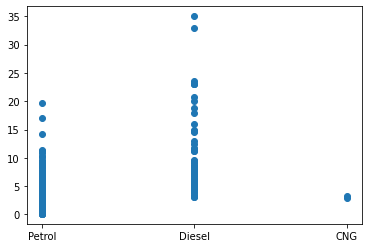

In [28]:
# plotting fuel type and selling price
plt.scatter(df["Fuel_Type"], df["Selling_Price"])

In [29]:
# finding the number of unique cars
df["Car_Name"].nunique()

98

In [30]:
# finding the age of car (present year - buying year)
df["No_Year"] = 2020 - df["Year"]

In [31]:
# dropping 
df.drop(['Car_Name', 'Year'], axis = 1, inplace = True)

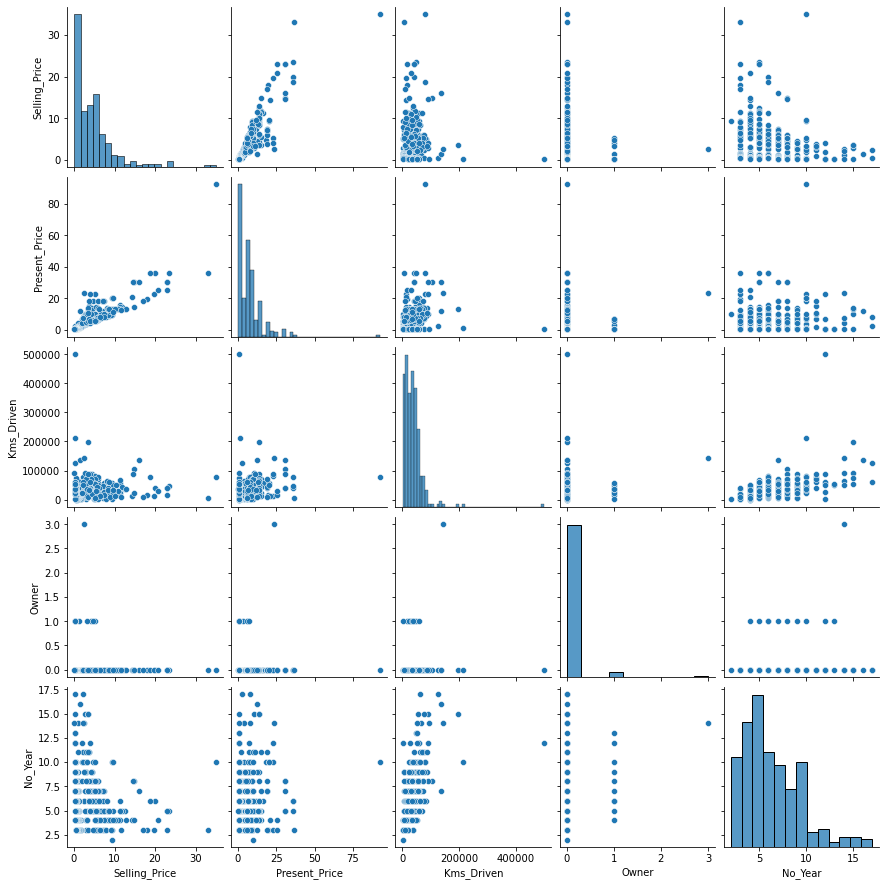

In [32]:
# pairplot
sns.pairplot(df)

<AxesSubplot:>

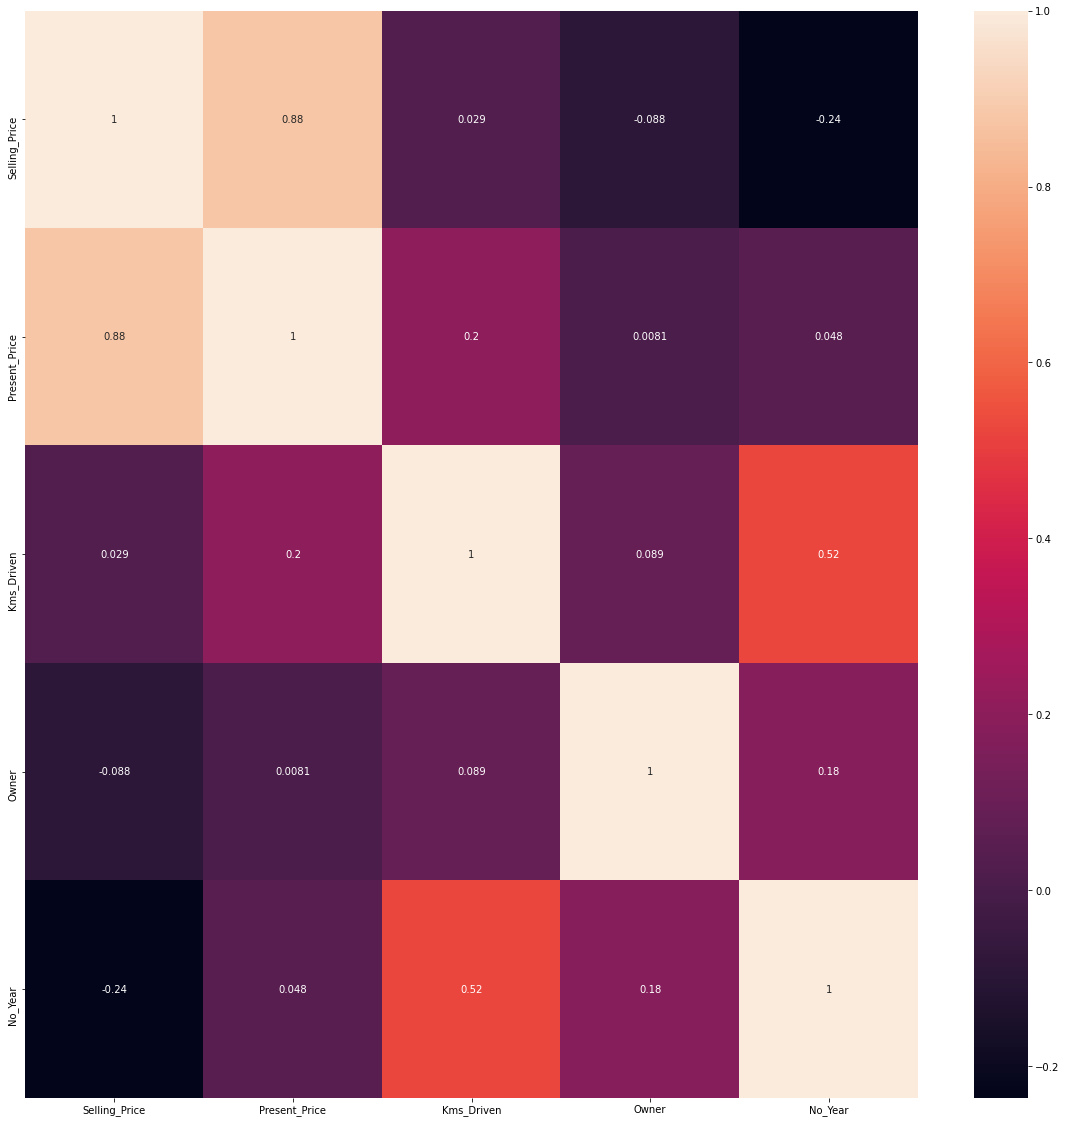

In [33]:
# correlation plot
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [34]:
# output(y) and input(x)
y = df["Selling_Price"]
df.drop(["Selling_Price"], axis = 1, inplace = True)
x = df

In [35]:
# handling categorical variables
x = pd.get_dummies(x, drop_first = True)

In [37]:
x.head()

,Present_Price,Kms_Driven,Owner,No_Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [38]:
# train test spliting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [39]:
# importing essential algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [40]:
# creating model dictionary for gridsearch
model_param = {

    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            'n_estimators':[100,300,500,700]
        }
    },
    'decision_Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'max_depth':[5,10,20]
        }
    }
    
}

In [41]:
model_param

{'random_forest': {'model': RandomForestRegressor(),
  'params': {'n_estimators': [100, 300, 500, 700]}},
 'decision_Tree': {'model': DecisionTreeRegressor(),
  'params': {'max_depth': [5, 10, 20]}}}

In [42]:
# grid search crossvalidation

scores = []

for mn, mp in model_param.items():
    model = GridSearchCV(mp['model'], mp['params'],cv = 5, return_train_score = False, verbose = 0)
    model.fit(X_train,y_train)
    scores.append({
        'model':mp['model'],
        'best_score':model.best_score_,
        'best_params':model.best_params_
    })

In [43]:
# best parameters after performing cross validation
best_param = pd.DataFrame(scores)
best_param

,model,best_score,best_params
0,RandomForestRegressor(),0.918641,{'n_estimators': 300}
1,DecisionTreeRegressor(),0.908437,{'max_depth': 5}


In [44]:
# creating our model
model = RandomForestRegressor(n_estimators = 300)

In [45]:
#training the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300)

In [46]:
#prediction of model
y_pred = model.predict(X_test)

C:\Users\user\Downloads\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

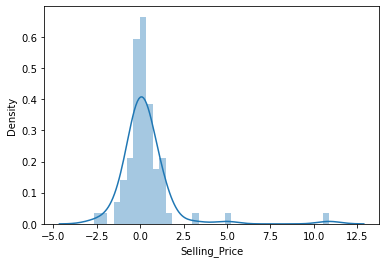

In [47]:
# analysing the ouput
sns.distplot(y_test-y_pred)

In [48]:
2//3

0

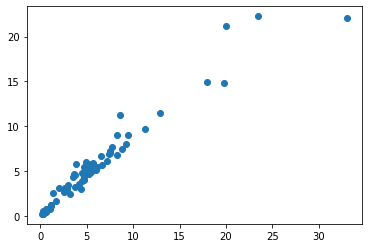

In [49]:
plt.scatter(y_test, y_pred)

In [50]:
# calculating the RMSE
from sklearn import metrics

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 1.5997931436366712
